In [1]:
#Project 2 IDS CS418

In [2]:
#import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.stats.mstats import zscore
import statsmodels.formula.api as smf
import numpy
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [3]:
#read csv
df = pd.read_csv('merged_train.csv')
df.head()

State    County  FIPS  Total Population  \
0    AZ    apache  4001             72346   
1    AZ   cochise  4003            128177   
2    AZ  coconino  4005            138064   
3    AZ      gila  4007             53179   
4    AZ    graham  4009             37529   

   Percent White, not Hispanic or Latino  \
0                              18.571863   
1                              56.299492   
2                              54.619597   
3                              63.222325   
4                              51.461536   

   Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
0                               0.486551                    5.947806   
1                               3.714395                   34.403208   
2                               1.342855                   13.711033   
3                               0.552850                   18.548675   
4                               1.811932                   32.097844   

   Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0              1.719515       50.598513                 45.854643   
1             11.458374       49.069646                 37.902276   
2              4.825298       50.581614                 48.946141   
3              4.249798       50.296170                 32.238290   
4              4.385942       46.313518                 46.393456   

   Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                 13.322091                    32460           15.807433   
1                 19.756275                    45383            8.567108   
2                 10.873943                    51106            8.238305   
3                 26.397638                    40593           12.129932   
4                 12.315809                    47422           14.424104   

   Percent Less than High School Degree  Percent Less than Bachelor's Degree  \
0                             21.758252                            88.941063   
1                             13.409171                            76.837055   
2                             11.085381                            65.791439   
3                             15.729958                            82.262624   
4                             14.580797                            86.675944   

   Percent Rural  Democratic  Republican  Party  
0      74.061076       16298        7810      1  
1      36.301067       17383       26929      0  
2      31.466066       34240       19249      1  
3      41.062000        7643       12180      0  
4      46.437399        3368        6870      0

In [4]:
def modelScore(X_train, Y_train, X_val, Y_val):
    model = linear_model.LinearRegression()
    model = model.fit(X = X_train, y = Y_train)
    score_val = model.predict(X = X_val) # R squared (validation)
    corr_coef = numpy.corrcoef(Y_val, score_val)[1,0]**2
    adj_r_sq = 1- ((1-corr_coef)*(len(Y_val)-1))/(len(Y_val)-X_train.shape[1]-1)
    return corr_coef, adj_r_sq, model
def RegularizationModel(X_train, Y_train, X_val, Y_val,model):
    if model == "lasso":
        model = linear_model.Lasso(alpha = 1).fit(X = X_train, y = Y_train)
    else:
        model = linear_model.Ridge(alpha = 1).fit(X = X_train, y = Y_train) 
    score_val = model.predict(X = X_val) # R squared (validation)
    corr_coef = numpy.corrcoef(Y_val, score_val)[1,0]**2
    adj_r_sq = 1- ((1-corr_coef)*(len(Y_val)-1))/(len(Y_val)-X_train.shape[1]-1)
    return corr_coef, adj_r_sq , model


In [5]:
#Question 1 : Partitioning the data using the holdout method
X_train, X_val, Y_train, Y_val = train_test_split(df[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Democratic'], test_size = 0.2, random_state = 0)
print(X_train.info())
print(X_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 1090 to 684
Data columns (total 13 columns):
Total Population                         956 non-null int64
Percent White, not Hispanic or Latino    956 non-null float64
Percent Black, not Hispanic or Latino    956 non-null float64
Percent Hispanic or Latino               956 non-null float64
Percent Foreign Born                     956 non-null float64
Percent Female                           956 non-null float64
Percent Age 29 and Under                 956 non-null float64
Percent Age 65 and Older                 956 non-null float64
Median Household Income                  956 non-null int64
Percent Unemployed                       956 non-null float64
Percent Less than High School Degree     956 non-null float64
Percent Rural                            956 non-null float64
Percent Less than Bachelor's Degree      956 non-null float64
dtypes: float64(11), int64(2)
memory usage: 104.6 KB
None
<class 'pandas.core.frame.DataFr

In [6]:
#Question 2: Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)


In [7]:
#Question 3: Multiple Linear Regression with the Total Population: Percent Rural as variables.
modelscore,adj, reg_model = modelScore(X_train, Y_train, X_val, Y_val)
print(modelscore,adj)

0.9312193337733049 0.9272453397246514


In [8]:
# Single Total Population
X_train, X_val, Y_train, Y_val = train_test_split(df[['Total Population']], df['Democratic'], test_size = 0.2, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
modelscore,adj, reg_model = modelScore(X_train, Y_train, X_val, Y_val)

print(modelscore,adj)


0.9384743656014513 0.938214763768546


In [9]:
# Lasso Regression
X_train, X_val, Y_train, Y_val = train_test_split(df[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Democratic'], test_size = 0.2, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)
final_scaler = scaler
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
lasso, adj, final_reg_model = RegularizationModel(X_train, Y_train, X_val, Y_val,'lasso')
print(lasso, adj)

0.9312421464783331 0.9272694704970813


In [10]:
#Ridge Regression
X_train, X_val, Y_train, Y_val = train_test_split(df[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Democratic'], test_size = 0.2, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
lasso, adj, reg_model = RegularizationModel(X_train, Y_train, X_val, Y_val,'ridge')
print(lasso, adj)

0.9311120976958707 0.9271319077849655


In [11]:
# Question 2 and 3 -- Republican

In [12]:
#Question 2,3 : Standardize and Linear Regression
X_train, X_val, Y_train, Y_val = train_test_split(df[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Republican'], test_size = 0.2, random_state = 0)

# ALL multiple regression
scaler = StandardScaler()
scaler.fit(X_train)
rep_scaler = scaler
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
modelscore, adj,final_reg_rep_model = modelScore(X_train, Y_train, X_val, Y_val)
print(modelscore, adj)

0.6948219003493743 0.677189387925116


In [13]:
# Single Total Population
X_train, X_val, Y_train, Y_val = train_test_split(df[['Total Population']], df['Republican'], test_size = 0.2, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
modelscore,adj, reg_model = modelScore(X_train, Y_train, X_val, Y_val)
print(modelscore,adj)


0.6349943253258931 0.6334542169939348


In [14]:
# Lasso Regression
X_train, X_val, Y_train, Y_val = train_test_split(df[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Republican'], test_size = 0.2, random_state = 0)
X_train = pd.get_dummies(X_train, drop_first = True)
X_val = pd.get_dummies(X_val, drop_first = True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
lasso,adj,reg_model = RegularizationModel(X_train, Y_train, X_val, Y_val,'lasso')
print(lasso)

0.694802080508024


In [15]:
#Ridge Regression
X_train, X_val, Y_train, Y_val = train_test_split(df[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Republican'], test_size = 0.2, random_state = 0)
X_train = pd.get_dummies(X_train, drop_first = True)
X_val = pd.get_dummies(X_val, drop_first = True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
lasso, adj, reg_model = RegularizationModel(X_train, Y_train, X_val, Y_val,'ridge')
print(lasso)

0.6946671559796616


In [16]:
#Question 4 -- Standardize and classify

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Party'], random_state = 0, test_size = 0.25)

In [18]:
#Naive Bayes
scaler = StandardScaler()
scaler.fit(x_train)
class_scaler = scaler
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
final_classifier = GaussianNB()  
final_classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
y_pred = final_classifier.predict(x_test)

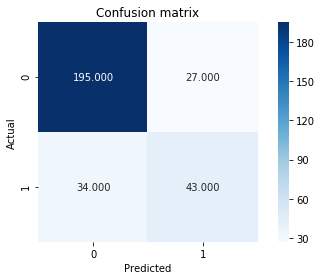

In [20]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [21]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7959866220735786, 0.20401337792642138, array([0.85152838, 0.61428571]), array([0.87837838, 0.55844156]), array([0.86474501, 0.58503401])]


In [22]:
x_train, x_test, y_train, y_test = train_test_split(df[['Total Population','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Party'], random_state = 0, test_size = 0.25)

In [23]:
#Naive Bayes
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
classifier = GaussianNB()  
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
y_pred = classifier.predict(x_test)

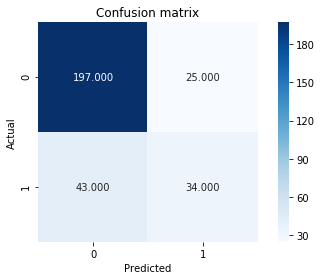

In [25]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [26]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7725752508361204, 0.22742474916387956, array([0.82083333, 0.57627119]), array([0.88738739, 0.44155844]), array([0.85281385, 0.5       ])]


In [27]:
#SVM
x_train, x_test, y_train, y_test = train_test_split(df[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Party'], random_state = 0, test_size = 0.25)


In [28]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train = scaler.transform(x_train)
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)

/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred = classifier.predict(x_test)

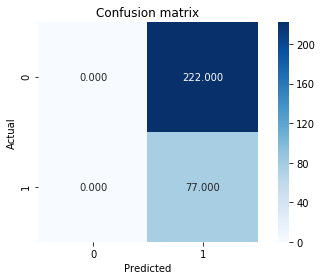

In [30]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [31]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.25752508361204013, 0.7424749163879598, array([0.        , 0.25752508]), array([0., 1.]), array([0.        , 0.40957447])]


/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [32]:
#SVM2
x_train, x_test, y_train, y_test = train_test_split(df[['Total Population','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Party'], random_state = 0, test_size = 0.25)
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)

/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred = classifier.predict(x_test)

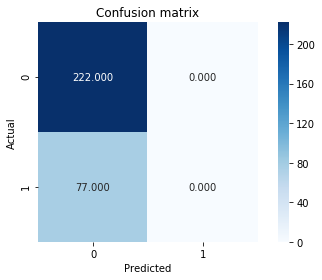

In [34]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [35]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7424749163879598, 0.2575250836120402, array([0.74247492, 0.        ]), array([1., 0.]), array([0.85220729, 0.        ])]


/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [36]:
#Question 5
#Combination 1 (Multiple predictor variables)
X = df[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']]
Y = df['Party']


[-0.001047512629882871, 0.6487451770620387]


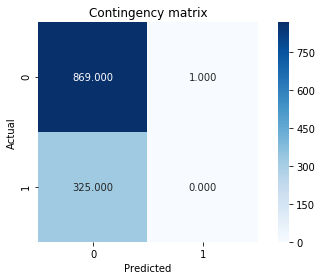

In [37]:
#Clustering using Linkage single method
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
clustering = linkage(X, method = "single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters.shape

cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])


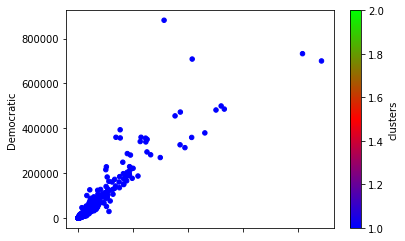

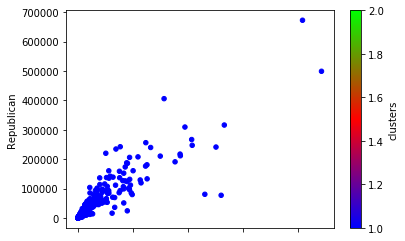

In [38]:
df['clusters'] = clusters
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Democratic', c = 'clusters', colormap = plt.cm.brg)
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)


[0.016835428116791826, 0.6180072991309411]


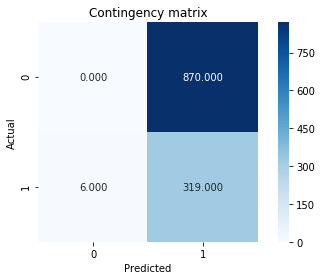

In [39]:
#Clustering using Linkage complete method
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters.shape

cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])


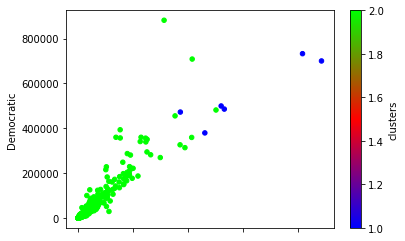

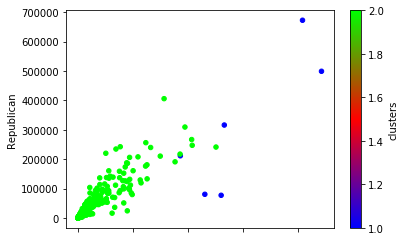

In [40]:
df['clusters'] = clusters
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Democratic', c = 'clusters', colormap = plt.cm.brg)
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)

[0.19751656022671712, 0.30700290833697047]


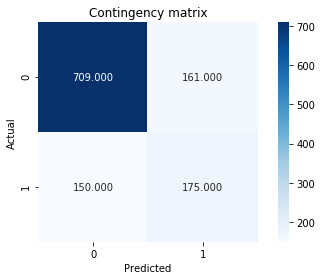

In [41]:
#Clustering using Kmeans
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0)
clustering.fit(X)
clusters = clustering.labels_
cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

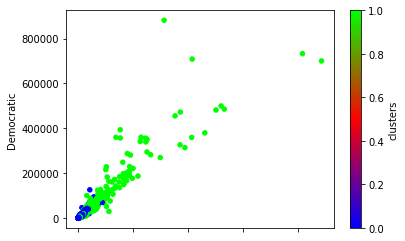

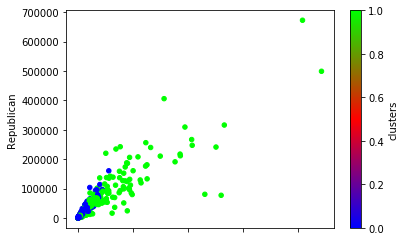

In [42]:
df['clusters'] = clusters
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Democratic', c = 'clusters', colormap = plt.cm.brg)
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)

In [43]:
#Question 5
#Combination 2 (Ethinicity)

X = df[['Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino']]
Y = df['Party']


[0.0028041107323011935, 0.5943319093182975]


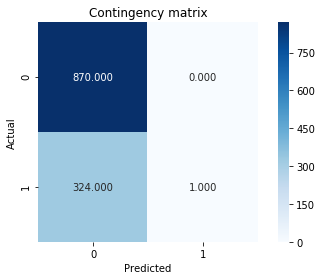

In [44]:
#Clustering using Linkage single method
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
clustering = linkage(X, method = "single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters.shape

cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])


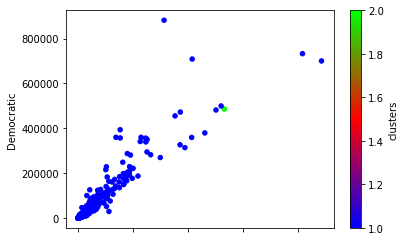

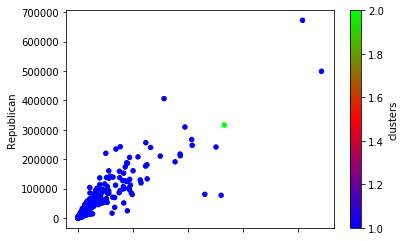

In [45]:
df['clusters'] = clusters
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Democratic', c = 'clusters', colormap = plt.cm.brg)
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)


[0.0658444577077045, 0.612452989449621]


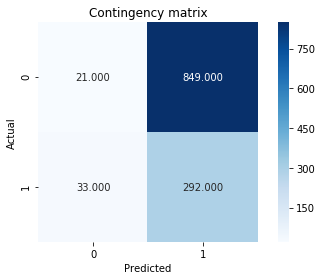

In [46]:
#Clustering using Linkage complete method
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters.shape

cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])


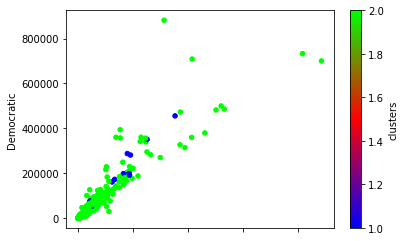

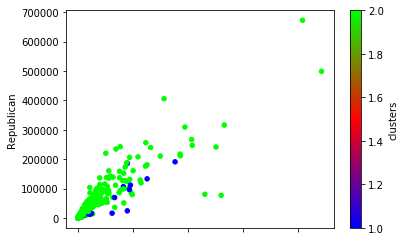

In [47]:
df['clusters'] = clusters
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Democratic', c = 'clusters', colormap = plt.cm.brg)
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)

[0.09600867521421738, 0.6103802875111837]


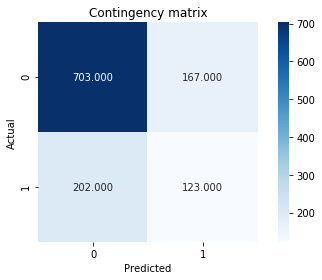

In [48]:
#Clustering using Kmeans
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0)
clustering.fit(X)
clusters = clustering.labels_
cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

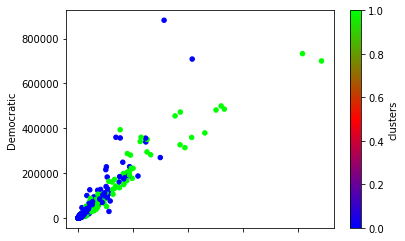

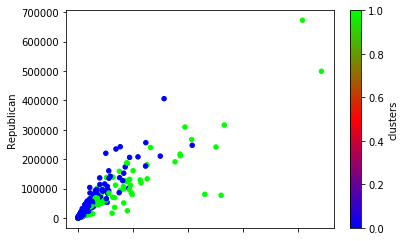

In [49]:
df['clusters'] = clusters
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Democratic', c = 'clusters', colormap = plt.cm.brg)
ax = df.plot(kind = 'scatter', x = 'Total Population', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)

In [56]:
#Question 6
x_train = df[['Total Population','Percent White, not Hispanic or Latino',
                'Percent Black, not Hispanic or Latino','Percent Hispanic or Latino',
                'Percent Foreign Born','Percent Female','Percent Age 29 and Under',
                'Percent Age 65 and Older','Median Household Income','Percent Unemployed',
                'Percent Less than High School Degree',"Percent Less than Bachelor's Degree",
                'Percent Rural']]
y_train= df['Party']

x_test = df[['Total Population','Percent White, not Hispanic or Latino',
                'Percent Black, not Hispanic or Latino','Percent Hispanic or Latino',
                'Percent Foreign Born','Percent Female','Percent Age 29 and Under',
                'Percent Age 65 and Older','Median Household Income','Percent Unemployed',
                'Percent Less than High School Degree',"Percent Less than Bachelor's Degree",
                'Percent Rural']]

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

classifier = GaussianNB()  
classifier.fit(x_train_scaled, y_train)
y_pred = classifier.predict(x_test_scaled)

fips = df['FIPS']
values= y_pred.tolist()

colorscale = ['#f54242', '#4287f5']

fig = ff.create_choropleth(fips=fips, values=values, scope=['usa'],
                           title_text = 'Map of Democratic counties and Republican counties',
                           colorscale=colorscale,
                           state_outline={'color': 'rgb(0,0,0)', 'width': 1},
                           county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
                           legend_title='Party')
fig.layout.template = None
fig.show()









/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [51]:
#Question 7

test_dataset = pd.read_csv('demographics_test.csv')
test_dataset.head()

State       County   FIPS  Total Population  \
0    NV       eureka  32011              1730   
1    TX       zavala  48507             12107   
2    VA  king george  51099             25260   
3    OH     hamilton  39061            805965   
4    TX       austin  48015             29107   

   Percent White, not Hispanic or Latino  \
0                              98.265896   
1                               5.798299   
2                              73.804434   
3                              66.354867   
4                              63.809393   

   Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
0                               0.057803                    0.462428   
1                               0.594697                   93.326175   
2                              16.722090                    4.441805   
3                              25.654340                    2.890944   
4                               8.479060                   25.502456   

   Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0              0.346821       51.156069                 27.109827   
1              9.193029       49.723301                 49.302057   
2              2.505938       50.166271                 40.186065   
3              5.086945       51.870615                 40.779686   
4              9.946061       50.671660                 37.351840   

   Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                 15.606936                    70000            3.755365   
1                 12.480383                    26639           11.955168   
2                 11.868567                    84342            6.479939   
3                 14.161657                    50399            7.864630   
4                 17.799842                    56681            5.782337   

   Percent Less than High School Degree  Percent Less than Bachelor's Degree  \
0                              8.415466                            83.396513   
1                             40.840797                            90.869691   
2                              7.152824                            65.540254   
3                              9.873275                            64.404446   
4                             17.579456                            79.008391   

   Percent Rural  
0     100.000000  
1      38.032029  
2      73.189450  
3       2.231877  
4      66.344090

In [52]:
#Predicting Democratic
scaler = final_scaler
test_data = test_dataset[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']]
test_data = scaler.transform(test_data)
lassopredicteddemo = final_reg_model.predict(X = test_data)

In [53]:
#Predicting Republican
scaler = rep_scaler
test_data = test_dataset[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']]
test_data = scaler.transform(test_data)
lassopredictedrepub = final_reg_rep_model.predict(X = test_data)

In [54]:

#classification
scaler = class_scaler
test_data = test_dataset[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']]
test_data = scaler.transform(test_data)
classPredicted = final_classifier.predict(X = test_data)

        

In [55]:
import csv

with open('output.csv', mode='w') as csv_file:
    fieldnames = ['State', 'County', 'Democratic', 'Republican', 'Party']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    with open('demographics_test.csv', 'r') as readFile:
        reader = csv.reader(readFile)
        next(reader)
        for i,row in enumerate(reader):
            writer.writerow({'State': row[0], 'County': row[1], 'Democratic': int(round(lassopredicteddemo[i])),'Republican': int(round(lassopredictedrepub[i])),'Party':int(round(classPredicted[i]))})